In [1]:
import os
os.chdir('..')
from bilevel.synth_datagen import SynthGenLinear

In [2]:
# os.chdir('folktables-experiments/multidecomp/')
!pwd

/Users/krishna/Documents/Research/Simultaneous Classifier/folktables-experiments/multidecomp


In [2]:
import numpy as np
import pandas as pd

- Each feature $x$ generated from some fixed distribution, e.g. uniform $[0, 1]^d$
- Each group label is linearly realizable i.e. its $w_g^\top x$
- Idea to generate different models for different groups
Sample $w_1, \ldots w_{|G|}$ from a Multivariate uniform with high variance $U[0,1]^n$; fix these to be the true regressors, with perhaps some small noise, i.e. $y_g = w_g^\top x + noise$
- A_t is generated by non atomic discrete prob, see section outline

In [20]:
params = {'samples': 100000, 'dim':20, 
        'group_dict': {'SEX':['male', 'female'], 'RACE': ['white', 'black', 'two-or-more','some-other', 'asian', 'native-am']},
        'prob_dict': {'SEX': [0.5, 0.5], 'RACE': [0.61, 0.12, 0.1, 0.08, 0.06, 0.03]},
        'feat_lo': 0.0, 'feat_hi': 1.0, 'w_lo': 0.0, 'w_hi': 1.0,
        'add_linear_mapping': True, 'add_quad_mapping' : False, 
        'S_lo': 0.0, 'S_hi':0.0,
        'label_noise_width':0.16, 'drop_sensitive':False
        }
# group dominance ordering, linear for lexicographically first!

# TODO add noise?

# params = {'samples': 100000, 'dim':20, 
#         'group_dict': {'SEX':['male', 'female'], 'RACE': ['white', 'black', 'two-or-more','some-other', 'asian', 'native-am']},
#         'prob_dict': {'SEX': [0.5, 0.5], 'RACE': [0.61, 0.12, 0.1, 0.08, 0.06, 0.03]},
#         'feat_lo': 0.0, 'feat_hi': 1.0, 'w_lo': 0.0, 'w_hi': 100.0, 
#         'label_noise_width':100, 'drop_sensitive':False
#         }
syn_ob = SynthGenLinear(**params)

print(syn_ob.dperm, np.array(syn_ob.all_groupnames)[syn_ob.dperm])
df = syn_ob.df

[1 3 0 2 7 6 5 4] ['female' 'black' 'male' 'white' 'native-am' 'asian' 'some-other'
 'two-or-more']


In [21]:
df.columns

Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18',
       'x_19', 'g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more',
       'g_some-other', 'g_asian', 'g_native-am', 'y_male', 'y_female',
       'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian',
       'y_native-am', 'y_mean_active', 'y_min_active', 'y_max_active',
       'y_dperm_active'],
      dtype='object')

In [7]:
# df.at[0, 'bin_masked_labels']

In [8]:
# df.at[0, 'bin_masked_labels'][df.iloc[0][filter_group].to_numpy(dtype=int)]
# # df.iloc[0][filter_group].to_numpy() 

In [9]:
# df['y_min_active']  = None
# df['y_max_active']  = None
# df['y_mean_active'] = None
# for t in tqdm(df.shape[0]):
#     df.at[t, 'bin_masked_labels']

In [22]:
filter_feature = [col for col in df if col.startswith('x')]
filter_label = [col for col in df if col.startswith('y')]
filter_group = [col for col in df if col.startswith('g')]
print(filter_feature, filter_label, filter_group)

['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19'] ['y_male', 'y_female', 'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian', 'y_native-am', 'y_mean_active', 'y_min_active', 'y_max_active', 'y_dperm_active'] ['g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more', 'g_some-other', 'g_asian', 'g_native-am']


In [7]:
df[filter_group]

,g_male,g_female,g_white,g_black,g_two-or-more,g_some-other,g_asian,g_native-am
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
99995,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
99997,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


# Even though labels for each group are realizable by linear, their combination is not linear!
Single linear learner unable to capture this, and as expected cannot get a perfect r2

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
random_seed = 21

X_train, X_test, y_train, y_test = train_test_split(df[filter_feature], 
                                                    df['y_mean_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for mean of active
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

X_train, X_test, y_train, y_test = train_test_split(df[filter_feature], 
                                                    df['y_min_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for min of active
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

X_train, X_test, y_train, y_test = train_test_split(df[filter_feature], 
                                                    df['y_max_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for max of active
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

X_train, X_test, y_train, y_test = train_test_split(df[filter_feature], 
                                                    df['y_dperm_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for dperm of active
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.6265195646834794 0.6182794408978999
0.5837526371106528 0.5763808001822724
0.5471421950703026 0.5394337231845483
0.4355089542958742 0.43293193802579677


In [24]:
## with group onehot encoding added in, better!

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
random_seed = 21

X_train, X_test, y_train, y_test = train_test_split(df[filter_feature + filter_group], 
                                                    df['y_mean_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for mean of active
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

X_train, X_test, y_train, y_test = train_test_split(df[filter_feature + filter_group], 
                                                    df['y_min_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for min of active
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

X_train, X_test, y_train, y_test = train_test_split(df[filter_feature + filter_group], 
                                                    df['y_max_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for max of active
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

X_train, X_test, y_train, y_test = train_test_split(df[filter_feature + filter_group], 
                                                    df['y_dperm_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)
# for dperm of active
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.9212533311877505 0.9205904415655739
0.813213067201477 0.8134507889526156
0.842396585391619 0.8404666513886624
0.8517721707715263 0.8504986395845907


In [10]:
df[filter_label].describe()

,y_male,y_female,y_white,y_black,y_two-or-more,y_some-other,y_asian,y_native-am,y_mean_active,y_min_active,y_max_active,y_dperm_active
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.314511,6.764975,4.455087,5.178107,4.874721,5.620983,5.647418,4.396923,5.393662,4.509811,6.277514,4.755098
std,1.272213,1.385907,1.255739,1.251840,1.238236,1.277755,1.274829,1.199568,1.122094,1.224756,1.359364,1.330870
min,-0.180064,0.596930,-0.786084,0.331634,-0.536059,0.181935,-0.139503,-0.598745,0.793407,-0.786084,1.084152,-0.786084
25%,4.461757,5.828636,3.602501,4.332402,4.039205,4.759818,4.788758,3.587015,4.630007,3.685855,5.332726,3.849600
50%,5.318407,6.767616,4.449805,5.177760,4.870887,5.612316,5.645837,4.399343,5.382560,4.509799,6.224938,4.746020
75%,6.170864,7.700611,5.308009,6.020797,5.712157,6.486324,6.512585,5.204445,6.147146,5.337549,7.169369,5.645295
max,10.409482,12.845086,9.595360,11.460058,10.784488,11.749717,11.066094,9.918418,9.963333,9.736265,12.845086,10.746034


# Batch comparing models across different groups, are they similar or not
- use model trained on data for one group, test it on data of another (test its r2 score on data of other)

In [18]:
y_all = [col for col in df if col.startswith('y')]
print(np.all(y_all==filter_label))
print(filter_group)
print(filter_feature)

True
['g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more', 'g_some-other', 'g_asian', 'g_native-am']
['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18', 'x_19']


In [19]:
df.columns

Index(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9',
       'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16', 'x_17', 'x_18',
       'x_19', 'g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more',
       'g_some-other', 'g_asian', 'g_native-am', 'y_male', 'y_female',
       'y_white', 'y_black', 'y_two-or-more', 'y_some-other', 'y_asian',
       'y_native-am', 'y_mean_active', 'y_min_active', 'y_max_active',
       'y_dperm_active'],
      dtype='object')

In [20]:
# tranining on data for only each group
from sklearn.model_selection import train_test_split
random_seed = 21
X_train, X_test, y_train, y_test = train_test_split(df.drop(filter_label, axis = 1), 
                                                    df['y_dperm_active'], test_size = 0.2,
                                                    shuffle=True, random_state= random_seed)

models_lr_dict = {}
group_sizes = {}

for g in filter_group:
    indices = (X_train[g] == 1)
    model_lr = LinearRegression()
    model_lr.fit(X_train[indices][filter_feature], y_train[indices])
    key = g
    group_sizes[key] = indices.sum() #sum of all the trues
    models_lr_dict[key] = model_lr

In [21]:
for g in filter_group:
    indices = (X_test[g] == 1)
    key = g
    r2_score_lr = models_lr_dict[key].score(X_test[indices][filter_feature], y_test[indices])
    print(f" {key}, test group size {group_sizes[key]}  r2 score for least squares is {r2_score_lr:.4f}")

 g_male, test group size 39844  r2 score for least squares is 0.2578
 g_female, test group size 40156  r2 score for least squares is 0.3109
 g_white, test group size 48783  r2 score for least squares is 0.2149
 g_black, test group size 9560  r2 score for least squares is 0.2079
 g_two-or-more, test group size 8042  r2 score for least squares is 0.2039
 g_some-other, test group size 6363  r2 score for least squares is 0.2173
 g_asian, test group size 4842  r2 score for least squares is 0.1849
 g_native-am, test group size 2410  r2 score for least squares is 0.2065


In [22]:
def cross_test_models(model_dict: dict):
    '''
        model_dict: maps keys to linear model, these linear models are already trained and have weights
        sex_cats: labels for the different sexes
        race_cats: labels for the different races
        This function computes the performance of one model on another models data

        With an example, model_dict['SEX_1'] has the linear model trained only of those points which have SEX == 1
        we will test its performance on all the other groups data.
    '''
    keys = list(model_dict.keys())
    l = len(keys)
    mat_2d = np.zeros((l, l))
    for i in range(l):
        model_i = model_dict[keys[i]]
        for j in range(l):
            key = keys[j]
            indices_j = (X_test[key] == 1)
            mat_2d[i, j] = model_i.score(X_test[indices_j][filter_feature], y_test[indices_j]) # how model i performs on test data meant for model j, R2 score
    return mat_2d, keys

In [23]:
import numpy as np
crossmat, keys = cross_test_models(models_lr_dict)
print(crossmat, keys)

[[ 0.25781365 -0.45335237  0.0499572   0.01800842  0.05530906  0.06864937
   0.02763092  0.05791014]
 [-0.53659514  0.31091751  0.04497069  0.05845837  0.02711292  0.03694722
   0.02199626  0.04474022]
 [ 0.06182232  0.11640623  0.21485114  0.2113984   0.20877291  0.22078359
   0.19195957  0.21521903]
 [ 0.07139744  0.10140348  0.21247937  0.20790379  0.20401268  0.2200556
   0.19082553  0.21416611]
 [ 0.03778177  0.13564795  0.21322472  0.21003007  0.20391942  0.21962269
   0.19068759  0.21404933]
 [ 0.03655814  0.13719702  0.21327408  0.21064061  0.20659968  0.21726603
   0.18967436  0.21561824]
 [ 0.0279333   0.13630591  0.20916498  0.20734855  0.19941811  0.21561363
   0.18489163  0.21442989]
 [ 0.04110595  0.11933837  0.20736682  0.20206383  0.20146588  0.21290429
   0.1874914   0.20645612]] ['g_male', 'g_female', 'g_white', 'g_black', 'g_two-or-more', 'g_some-other', 'g_asian', 'g_native-am']


In [24]:
import seaborn as sns # for data visualization
sns.heatmap(crossmat, annot=True, xticklabels=keys, yticklabels=keys)
# TODO - one vs many regressors, single linear check
# TODO - idea run Anh with always active and look at always active expert weight vs other experts

<Axes: >

Error in callback <function flush_figures at 0x16f137e20> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# df.to_pickle('./synthetic_res_models/dataframes/w0-1_X0-1_linear_racediff.pkl')
# df.to_pickle('./synthetic_res_models/dataframes/w0-1_X0-1_ydperm_linearbase2.pkl')

# Online pipeline

In [25]:
from bilevel.OnlineLinearExpert import *
from bilevel.OnlineTreeExpert import *
from bilevel.build_all_models import *

In [ ]:
# # reproducible seed for uniforms
# params = {'samples': 10000, 'dim':20, 
#         'group_dict': {'SEX':['male', 'female'], 'RACE': ['white', 'black', 'two-or-more','some-other', 'asian', 'native-am']},
#         'prob_dict': {'SEX': [0.5, 0.5], 'RACE': [0.61, 0.12, 0.1, 0.08, 0.06, 0.03]},
#         'feat_lo': 0.0, 'feat_hi': 100.0, 'w_lo': 0.0, 'w_hi': 100.0, 
#         'label_noise_width':100, 'drop_sensitive':True
#         }
# syn_ob = SynthGenLinear(**params)
# df = syn_ob.df

In [ ]:
# print(df.columns)
# filter_feature = [col for col in df if col.startswith('x')]
# filter_label = [col for col in df if col.startswith('y')]
# filter_group = [col for col in df if col.startswith('g')]
# print(filter_feature, filter_label, filter_group)

In [ ]:
# df['y_min_active'] = df.apply(lambda x: np.min(x['active_labels']), axis=1)
# df['y_max_active'] = df.apply(lambda x: np.max(x['active_labels']), axis =1)
# df['y_mean_active'] = df.apply(lambda x: np.mean(x['active_labels']), axis =1)

In [ ]:
# np.sum(syn_ob.A_t, axis = 0), np.sum(syn_ob.A_t, axis=1)

(array([49746., 50254., 60829., 11942., 10037.,  8034.,  6137.,  3021.]),
 array([2., 2., 2., ..., 2., 2., 2.]))

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def get_all_aggregations_linear(filter_x, l2_pen = 0.0):
    # y_lab_list = ['y_dperm_active', 'y_mean_active', 'y_min_active', 'y_max_active']
    y_lab_list = ['y_min_active']
    X_dat = df[filter_x]
    X_dat = numeric_scaler(X_dat, X_dat.columns)
    A_t = syn_ob.A_t
    b_lsbase_dict = dict.fromkeys(y_lab_list)
    b_Anhlist_dict = dict.fromkeys(y_lab_list)
    for y_lab in y_lab_list:
        y_dat = df[[y_lab]]
        y_dat = numeric_scaler(y_dat, y_dat.columns)
        y_dat = y_dat[y_lab]
        dirname_baseline = './synthetic_res_models/baseline'
        filename = 'aggregated_0-1x_w0-1' + y_lab
        b_lsbase_dict[y_lab] = build_baseline_alwayson(dirname_baseline, filename, A_t, OnlineLinearExpert(X_dat, y_dat, l2_pen = l2_pen))
        dirname_Anh = './synthetic_res_models/Anh/'
        b_Anhlist_dict[y_lab] = build_Anh(dirname_Anh, filename, A_t, [OnlineLinearExpert(X_dat, y_dat, l2_pen = l2_pen) for _ in range(A_t.shape[1])])
    return b_lsbase_dict, b_Anhlist_dict

def get_all_aggregations_tree(filter_x):
    # y_lab_list = ['y_dperm_active', 'y_mean_active', 'y_min_active', 'y_max_active']
    y_lab_list = ['y_min_active']
    X_dat = df[filter_x]
    X_dat = numeric_scaler(X_dat, X_dat.columns)
    X_datdict = X_dat.to_dict(orient='records')
    A_t = syn_ob.A_t
    b_lsbase_dict = dict.fromkeys(y_lab_list)
    b_Anhlist_dict = dict.fromkeys(y_lab_list)
    for y_lab in y_lab_list:
        y_dat = df[[y_lab]]
        y_dat = numeric_scaler(y_dat, y_dat.columns)
        y_dat = y_dat[y_lab]
        dirname_baseline = './synthetic_res_models/baseline'
        filename = 'aggregated_0-1x_w0-1' + y_lab
        b_lsbase_dict[y_lab] = build_baseline_alwayson(dirname_baseline, filename, A_t, OnlineHoeffdingTree(X_datdict, y_dat))
        dirname_Anh = './synthetic_res_models/Anh/'
        b_Anhlist_dict[y_lab] = build_Anh(dirname_Anh, filename, A_t, [OnlineHoeffdingTree(X_datdict, y_dat) for _ in range(A_t.shape[1])])
    return b_lsbase_dict, b_Anhlist_dict

def barplot_aggregations(b_lsbase_dict, b_Anhlist_dict):
    A_t = syn_ob.A_t
    for y_lab in b_lsbase_dict.keys():
       base_ends = [b_lsbase_dict[y_lab].expert.cumloss_groupwise[g][-1] for g in range(A_t.shape[1])]
       Anh_ends = [b_Anhlist_dict[y_lab].Anh.cuml_loss_curve[g][-1] for g in range(A_t.shape[1])]
       ind = np.arange(1, A_t.shape[1]+1)
       plt.bar(ind,  base_ends)
       plt.bar(ind, Anh_ends)
       plt.title(y_lab)
       plt.show()

def baseline_vs_Anh_printagg(b_lsbase_dict, b_Anhlist_dict):
    A_t = syn_ob.A_t
    for y_lab in b_lsbase_dict.keys():
       active_rounds = [len(b_lsbase_dict[y_lab].expert.cumloss_groupwise[g]) for g in range(A_t.shape[1])]
       base_ends = [b_lsbase_dict[y_lab].expert.cumloss_groupwise[g][-1] for g in range(A_t.shape[1])]
       Anh_ends = [b_Anhlist_dict[y_lab].Anh.cuml_loss_curve[g][-1] for g in range(A_t.shape[1])]
       print(y_lab)
       print("Active", active_rounds)
       print("Base:", base_ends)
       print("Anh:", Anh_ends)
       print("---------------")
    # for gnum in range(A_t.shape[1]):
    #     baseline_cl = baseline.cumloss_groupwise[gnum][-1]
    #     Anh_cl = Anh.cuml_loss_curve[gnum][-1]
    #     rounds_active = len(Anh.cuml_loss_curve[gnum])
    #     print(f'''Group {gnum}, active rounds {rounds_active}, Baseline : {baseline_cl},  Anh : {Anh_cl}''')
    #     print(f'''Group {gnum}, Avg loss Baseline : {baseline_cl / rounds_active},  Avg loss Anh : {Anh_cl / rounds_active}''')
    #     print(f'''Is Anh better {Anh_cl <= baseline_cl}''')

100%|██████████| 100000/100000 [02:50<00:00, 585.01it/s]


y_min_active
Active [49991, 50009, 61084, 11940, 10058, 8039, 5967, 2912]
Base: [454.10544266419896, 733.9197864583609, 583.903619291848, 176.2556188215337, 176.64779075347568, 87.5246879326146, 125.54595954524807, 38.14755277783934]
Anh: [410.2092779736253, 591.9166682199868, 566.044120791388, 136.88219892381332, 127.12194393233924, 59.83610153879172, 81.6410633792225, 30.60051762804908]
---------------


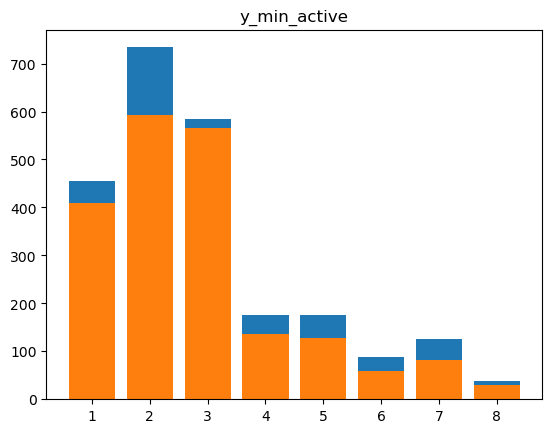

In [27]:
# try with Ridge experts l2_pen = 1
b_lsbase_dict, b_Anhlist_dict = get_all_aggregations_linear(filter_feature+filter_group, l2_pen = 1.0)
baseline_vs_Anh_printagg(b_lsbase_dict, b_Anhlist_dict)
barplot_aggregations(b_lsbase_dict, b_Anhlist_dict)

100%|██████████| 100000/100000 [02:46<00:00, 600.27it/s]


y_min_active
Active [49991, 50009, 61084, 11940, 10058, 8039, 5967, 2912]
Base: [135.182508878794, 194.6273785823952, 139.4692359917238, 48.72385940330991, 55.25262815193395, 31.06223138363508, 43.78271988595581, 11.519212644631834]
Anh: [52.462634825384356, 108.18791155187006, 76.44522843090976, 24.736353276141006, 22.346965785305326, 13.77823095580517, 16.074860026367627, 7.268907902724557]
---------------


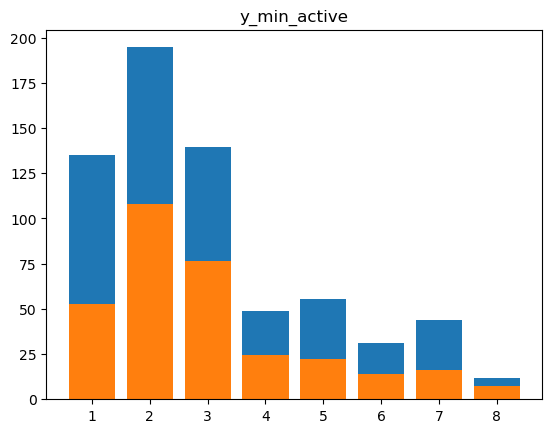

In [29]:
# try with ridge experts l2 pen = 1
b_lsbase_dict, b_Anhlist_dict = get_all_aggregations_linear(filter_feature+filter_group, l2_pen = 0.0)
baseline_vs_Anh_printagg(b_lsbase_dict, b_Anhlist_dict)
barplot_aggregations(b_lsbase_dict, b_Anhlist_dict)

In [15]:
b_lsbase_dict, b_Anhlist_dict = get_all_aggregations_linear(filter_feature+filter_group)
baseline_vs_Anh_printagg(b_lsbase_dict, b_Anhlist_dict)

100%|██████████| 100000/100000 [02:44<00:00, 606.43it/s]


y_dperm_active
Active [49991, 50009, 60881, 12115, 9906, 7969, 6088, 3041]
Base: [404.20376372228867, 403.3919947731089, 491.4041453707419, 99.59863301806517, 77.9290954849728, 64.77431490993214, 49.69997237565552, 24.189597336031497]
Anh: [381.87739483418767, 379.8228963840643, 461.84537876592907, 93.789921223202, 73.74857403434928, 61.695568187368, 47.146943025065596, 23.47390598234178]
---------------
y_mean_active
Active [49991, 50009, 60881, 12115, 9906, 7969, 6088, 3041]
Base: [356.94932665200025, 355.1889133073021, 420.38084587404563, 90.23651199730243, 73.14799108990617, 59.02925324180575, 46.36445538733206, 22.979182368915584]
Anh: [345.5710846165731, 342.74039517336774, 408.2192540608808, 86.27198531381951, 70.44817636832781, 56.54189202007978, 44.53478194845194, 22.29539007837981]
---------------
y_min_active
Active [49991, 50009, 60881, 12115, 9906, 7969, 6088, 3041]
Base: [405.3717191492707, 437.1463487516904, 490.067471178365, 117.61501272401058, 84.12343783015197, 68.478

In [13]:
b_lsbase_dict, b_Anhlist_dict = get_all_aggregations_tree(filter_feature+filter_group)
baseline_vs_Anh_printagg(b_lsbase_dict, b_Anhlist_dict) # trying with tree as meta learner, beats single linear baseline, but loses to anh with linears

100%|██████████| 100000/100000 [00:50<00:00, 1979.91it/s]


y_min_active
Active [49991, 50009, 60881, 12115, 9906, 7969, 6088, 3041]
Base: [396.91900793469654, 416.26415303095825, 484.7052185568617, 105.76262987369921, 80.80275185195191, 64.43269619424699, 52.63511794720015, 24.84474654169297]
Anh: [398.4119374974699, 415.10912864207353, 485.3569423439758, 106.41526664038162, 80.38979932067974, 63.939585698476215, 52.92538415174401, 24.494087984287862]
---------------


In [35]:
clc_Anhog = b_Anhlist_dict['y_min_active'].Anh.cuml_loss_curve
[print(clc_Anhog[i][-1], clc_Anhog[i].shape) for i in range(8)]
Anh_temp = b_Anhlist_dict['y_min_active'].Anh
cum_loss = np.array(Anh_temp.loss_ada_tarr).reshape(-1,1) * Anh_temp.A_t
np.sum(cum_loss, axis=0)


391.56931178686517 (49991,)
418.20198919500734 (50009,)
478.9537216079173 (60881,)
108.16252235071082 (12115,)
80.77400303455138 (9906,)
64.12813226238995 (7969,)
53.16313237229099 (6088,)
24.58978935401327 (3041,)


array([391.56931179, 418.2019892 , 478.95372161, 108.16252235,
        80.77400303,  64.12813226,  53.16313237,  24.58978935])

## Baseline vs Anh

In [ ]:
baseline_vs_Anh_printagg(b_lsbase_dict, b_Anhlist_dict) # group features not present

y_dperm_active
Active [50295, 49705, 61076, 12094, 9746, 7996, 6046, 3042]
Base: [418.7494440305212, 397.0160652971948, 485.02266802093936, 104.01506410082354, 81.01556735734603, 67.83554362689036, 52.7036690767858, 25.172997144936616]
Anh: [385.63182084596986, 362.35116038654166, 454.51448042465995, 92.41778654743086, 72.49081265800645, 59.74896986760258, 46.29109501263044, 22.519836722179406]
---------------
y_mean_active
Active [50295, 49705, 61076, 12094, 9746, 7996, 6046, 3042]
Base: [345.31132300178103, 338.62848787436513, 406.52476362089556, 84.41942745086848, 67.87095468344518, 58.65199319956629, 44.73743084298727, 21.735241078382384]
Anh: [330.3851097038731, 325.88230723307765, 391.32585585394133, 80.94564055842243, 64.99306983067989, 55.95580326061291, 42.42703680024321, 20.62001063305006]
---------------
y_min_active
Active [50295, 49705, 61076, 12094, 9746, 7996, 6046, 3042]
Base: [374.8371746798855, 411.1541937595567, 464.194893719428, 100.76881196568509, 78.40694206769912

In [ ]:
# 'SEX':['male', 'female'], 'RACE': ['white', 'black', 'two-or-more','some-other', 'asian', 'native-am']

In [ ]:
# TODO regret at end for each group IMP
# TODO can you pass group membership to the baseline linear model? IMP
# fully agnostic not reqd, ERM with random noise (FTPL), add back groups, try on dtree?
# TODO agnostic add quadratic but with small weights, gaussian noise is agnostic too
# TODO y_dperm like linear for the active perm!
# TODO intersections stuff?, not so imp rn

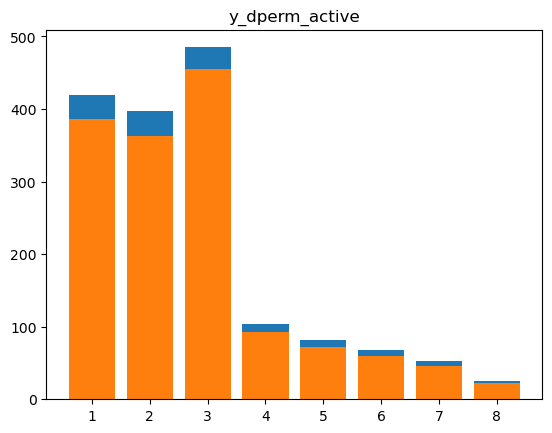

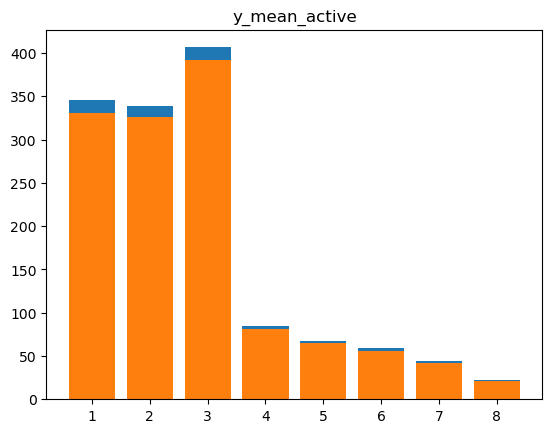

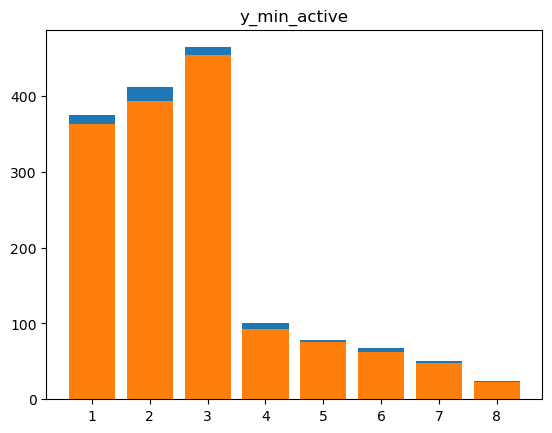

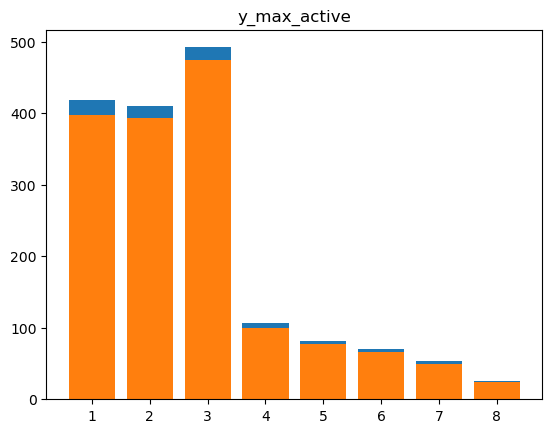

In [ ]:
barplot_aggregations(b_lsbase_dict, b_Anhlist_dict) # ylabels in [0,1]

In [ ]:
filter_group

['g_male',
 'g_female',
 'g_white',
 'g_black',
 'g_two-or-more',
 'g_some-other',
 'g_asian',
 'g_native-am']

## Loss on groups not explicity accounted for

- only have losses for 8 groups : [male, female,white,....native_am]
- lets check the loss on male & white, male & ...female & white, ... female & native_am 

In [ ]:
syn_ob.A_t.shape, syn_ob.A_t.sum(axis = 0), syn_ob.A_t.sum(axis = 1)

((100000, 8),
 array([49949., 50051., 61265., 11767., 10083.,  8015.,  5997.,  2873.]),
 array([2., 2., 2., ..., 2., 2., 2.]))

In [ ]:
sex_ind = [0, 1]
race_ind = [2, 3, 4, 5, 6, 7]

A_t = syn_ob.A_t
atomic_intersections = np.empty((A_t.shape[0], 12)) # # of samples x 12 atmoic groups 2 x 6
j = 0
for sex in sex_ind:
    for race in race_ind:
        atomic_intersections[:, j] = np.logical_and(A_t[:, sex], A_t[:, race])
        j += 1

In [ ]:
def fill_intersections(loss_tarr, atomic_intersections) -> list[np.ndarray]:
    cumloss_groupwise = []
    N = atomic_intersections.shape[1]
    loss_groupwise = []
    for gnum in range(N): # build cumulative loss for  on each group subsequence
        loss_groupwise.append(loss_tarr[atomic_intersections[:, gnum].astype(bool)]) # select those losses where group gnum active
        cumloss_groupwise.append(np.cumsum(loss_groupwise[-1])) #cumulative sum of the previous
    return cumloss_groupwise

In [ ]:
loss_baseline = (b_lsbase_dict['y_dperm_active'].expert.loss_tarr).reshape(-1,1)
cl_baseline = (loss_baseline * atomic_intersections).sum(axis=0)


In [ ]:
loss_Anh = np.array(b_Anhlist_dict['y_dperm_active'].Anh.loss_ada_tarr)
# TODO loss of intersections vs marginals
# cl_baseline = (loss_baseline * atomic_intersections).sum(axis=0)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (8,) + inhomogeneous part.

In [ ]:
type(b_Anhlist_dict['y_dperm_active'].Anh.cuml_loss_curve), len(b_Anhlist_dict['y_dperm_active'].Anh.loss_ada_tarr)

(list, 100000)

In [ ]:
loss_baseline.shape, atomic_intersections.shape, cl_baseline.shape

((100000, 1), (100000, 12), (12,))

In [ ]:
type(b_lsbase_dict['y_dperm_active'].expert.loss_tarr), type(b_Anhlist_dict['y_dperm_active'].Anh.loss_ada_tarr)

(numpy.ndarray, list)

In [ ]:
for gnu in range(atomic_intersections.shape[1]):
    print(gnu, cl_baseline_dperm[gnu][-1], cl_ada_dperm[gnu][-1])

0 0.0053379517200991804 6.456633024588552e-05
1 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


IndexError: tuple index out of range

In [ ]:
from collections import Counter
Counter(atomic_intersections[:,11])

Counter({0.0: 98575, 1.0: 1425})

In [ ]:
np.logical_and([[0,1,0]], [[0,0,1]])

array([[False, False, False]])

In [ ]:
# need to also minmax scale? so that all in 0-1
from bilevel.utils import numeric_scaler
# y_lab = 'y_dperm_active'
# y_lab = 'y_mean_active'
y_lab = 'y_min_active'
# y_lab = 'y_max_active'


X_dat = df[filter_feature]
y_dat = df[[y_lab]]
A_t = syn_ob.A_t

X_dat = numeric_scaler(X_dat, X_dat.columns)
y_dat = numeric_scaler(y_dat, y_dat.columns)
y_dat = y_dat[y_lab]

In [ ]:
X_dat.shape, y_dat.shape, A_t.shape

((100000, 20), (100000,), (100000, 8))

In [ ]:
dirname = './synthetic_res_models/baseline'
filename = 'lastAug27quad_leastsq_0-1x_w0-1'+y_lab

In [ ]:
exp_ls = OnlineLinearExpert(X_dat, y_dat, l2_pen = 0.0)
b_lsbase = build_baseline_alwayson(dirname, filename, A_t, exp_ls)

100%|██████████| 100000/100000 [01:05<00:00, 1519.95it/s]


In [ ]:
dirname = './synthetic_res_models/Anh/'
# filename = 'leastsq_x0-1,w0-100_ymax'
experts_ls = [OnlineLinearExpert(X_dat, y_dat, l2_pen = 0.0) for _ in range(A_t.shape[1])]
b_Anh = build_Anh(dirname, filename, A_t, experts_ls)

100%|██████████| 100000/100000 [02:17<00:00, 729.01it/s]


In [ ]:
# b_lsbase.expert.loss_tarr.shape, type(b_Anh.Anh.loss_ada_tarr)
type(b_Anh.Anh.loss_ada_tarr) , np.array(b_Anh.Anh.loss_ada_tarr).shape

(list, (100000,))

In [ ]:
loss_anh = np.array(b_Anh.Anh.loss_ada_tarr).reshape(-1,1)
loss_anh.shape

(100000, 1)

In [ ]:
(A_t * loss_anh).sum(axis=0) # great just brodcast label, then mult and sum along axis!

array([ 15.72671802, 130.5278351 ,  50.95830369,  35.4314268 ,
        12.65703367,  25.81133883,   9.38035842,  12.01609171])

In [ ]:
# for y_dperm
Anh_vs_baseline()

Group 0, active rounds 49770, Baseline : 362.3248092913538,  Anh : 85.55794575610592
Group 0, Avg loss Baseline : 0.007279984112745707,  Avg loss Anh : 0.001719066621581393
Is Anh better True
Group 1, active rounds 50230, Baseline : 544.9101393321995,  Anh : 239.36145878776898
Group 1, Avg loss Baseline : 0.010848300603866205,  Avg loss Anh : 0.004765308755480171
Is Anh better True
Group 2, active rounds 61069, Baseline : 671.3343972613301,  Anh : 256.2593523656907
Group 2, Avg loss Baseline : 0.010993047164049355,  Avg loss Anh : 0.0041962264383842976
Is Anh better True
Group 3, active rounds 11997, Baseline : 37.95982604885837,  Anh : 5.238484545715704
Group 3, Avg loss Baseline : 0.003164109864871082,  Avg loss Anh : 0.00043664954119494075
Is Anh better True
Group 4, active rounds 9758, Baseline : 48.93690331241036,  Anh : 4.761366608509451
Group 4, Avg loss Baseline : 0.0050150546538645585,  Avg loss Anh : 0.000487944928111237
Is Anh better True
Group 5, active rounds 8065, Baselin

In [ ]:
# for y_mean
Anh_vs_baseline()

Group 0, active rounds 49770, Baseline : 165.1095815323938,  Anh : 38.16904955241989
Group 0, Avg loss Baseline : 0.00331745190943126,  Avg loss Anh : 0.0007669087713968232
Is Anh better True
Group 1, active rounds 50230, Baseline : 163.67799111585322,  Anh : 39.45693210906633
Group 1, Avg loss Baseline : 0.0032585703984840376,  Avg loss Anh : 0.0007855252261410777
Is Anh better True
Group 2, active rounds 61069, Baseline : 177.4215528004507,  Anh : 23.24550489577441
Group 2, Avg loss Baseline : 0.002905263763946531,  Avg loss Anh : 0.0003806432870322817
Is Anh better True
Group 3, active rounds 11997, Baseline : 49.43309838130681,  Anh : 19.727592398811325
Group 3, Avg loss Baseline : 0.0041204549788536144,  Avg loss Anh : 0.001644377127516156
Is Anh better True
Group 4, active rounds 9758, Baseline : 35.20261311854664,  Anh : 10.408923079575809
Group 4, Avg loss Baseline : 0.0036075643695989584,  Avg loss Anh : 0.0010667066078679861
Is Anh better True
Group 5, active rounds 8065, Bas

In [ ]:
# for y_min
Anh_vs_baseline(b_lsbase.expert, b_Anh.Anh)

Group 0, active rounds 50211, Baseline : 132.5610971148741,  Anh : 15.726718016275134
Group 0, Avg loss Baseline : 0.0026400808013159285,  Avg loss Anh : 0.00031321260314025085
Is Anh better True
Group 1, active rounds 49789, Baseline : 240.64041840367605,  Anh : 130.52783509808486
Group 1, Avg loss Baseline : 0.00483320449102565,  Avg loss Anh : 0.0026216199381004814
Is Anh better True
Group 2, active rounds 60931, Baseline : 162.49040800668018,  Anh : 50.95830369151634
Group 2, Avg loss Baseline : 0.0026667937175933465,  Avg loss Anh : 0.0008363280381335665
Is Anh better True
Group 3, active rounds 11991, Baseline : 91.99601309855124,  Anh : 35.43142679861093
Group 3, Avg loss Baseline : 0.007672088491247706,  Avg loss Anh : 0.0029548350261538593
Is Anh better True
Group 4, active rounds 9989, Baseline : 30.055337028349836,  Anh : 12.657033668067099
Group 4, Avg loss Baseline : 0.003008843430608653,  Avg loss Anh : 0.0012670971736977775
Is Anh better True
Group 5, active rounds 8024,

In [ ]:
# for y_max
Anh_vs_baseline()

Group 0, active rounds 49770, Baseline : 359.27756085097064,  Anh : 38.27442259556541
Group 0, Avg loss Baseline : 0.007218757501526434,  Avg loss Anh : 0.0007690259713796547
Is Anh better True
Group 1, active rounds 50230, Baseline : 325.9135993812352,  Anh : 7.535953108785945
Group 1, Avg loss Baseline : 0.00648842523155953,  Avg loss Anh : 0.00015002892910185038
Is Anh better True
Group 2, active rounds 61069, Baseline : 443.6018293221776,  Anh : 17.58765073764522
Group 2, Avg loss Baseline : 0.007263944543421009,  Avg loss Anh : 0.00028799637684660335
Is Anh better True
Group 3, active rounds 11997, Baseline : 66.93810265729141,  Anh : 11.893430283385953
Group 3, Avg loss Baseline : 0.005579570113969443,  Avg loss Anh : 0.0009913670320401728
Is Anh better True
Group 4, active rounds 9758, Baseline : 60.60022423434083,  Anh : 6.077201543518285
Group 4, Avg loss Baseline : 0.006210311973185164,  Avg loss Anh : 0.0006227917138264281
Is Anh better True
Group 5, active rounds 8065, Base

In [ ]:
# df.to_pickle('./synthetic_res_models/dataframes/leastsq_x0-1,w0-100uniform.pkl')
df.to_pickle('./synthetic_res_models/dataframes/leastsq_x0-1,w0-1_senspresent.pkl')

masked array

In [ ]:
# mask = ma.masked_array(ar, mask=A_t==0), true entries in the bool are masked i.e. not used for computation
# masked_mul = mask * y_labels_mat # gets all the valid labels
# then can do max, min easily, avg easily; ignores the masked ones
#mean_ar = np.mean(masked_mul, axis=1)
#  ma.getdata(mean_ar) to get back the above

# for dominance order->
# can also permute simply masked_mul[:, [column perm]]
# 

Tree expert on this same data?

In [ ]:
# hoeffding tree?
dirname = './synthetic_res_models/baseline'
filename = 'hoefftree_linear0-1x_w0-1'+y_lab

In [ ]:
filename

'hoefftree_linear0-1x_w0-1y_min_active'

In [ ]:
X_datdict = X_dat.to_dict(orient='records')

In [ ]:
exp_tree = OnlineHoeffdingTree(X_datdict, y_dat)
b_treebase = build_baseline_alwayson(dirname, filename, A_t, exp_tree)

100%|██████████| 100000/100000 [00:18<00:00, 5400.83it/s]


In [ ]:
dirname = './synthetic_res_models/Anh/'
experts_tree = [OnlineHoeffdingTree(X_datdict, y_dat) for _ in range(A_t.shape[1])]
b_Anh = build_Anh(dirname, filename, A_t, experts_tree)

100%|██████████| 100000/100000 [00:47<00:00, 2095.99it/s]


In [ ]:
Anh_vs_baseline(b_treebase.expert, b_Anh.Anh) # tree always beaten by linear, nice

Group 0, active rounds 49891, Baseline : 334.0208303215698,  Anh : 89.76943541718342
Group 0, Avg loss Baseline : 0.006695011732007172,  Avg loss Anh : 0.0017993112067744366
Is Anh better True
Group 1, active rounds 50109, Baseline : 288.141421232839,  Anh : 79.53415111956161
Group 1, Avg loss Baseline : 0.005750292786382466,  Avg loss Anh : 0.0015872228765204178
Is Anh better True
Group 2, active rounds 60892, Baseline : 164.83963015609982,  Anh : 102.60192325634385
Group 2, Avg loss Baseline : 0.0027070818852410797,  Avg loss Anh : 0.001684981988706954
Is Anh better True
Group 3, active rounds 11833, Baseline : 34.87976170835554,  Anh : 25.611028089503833
Group 3, Avg loss Baseline : 0.0029476685293970705,  Avg loss Anh : 0.002164373201175005
Is Anh better True
Group 4, active rounds 10149, Baseline : 25.292993452568034,  Anh : 16.07822539569384
Group 4, Avg loss Baseline : 0.002492166070801856,  Avg loss Anh : 0.001584217695900467
Is Anh better True
Group 5, active rounds 8022, Base